In [1]:
import pandas as pd

# Load the datasets
game_events_df = pd.read_csv('/kaggle/input/player-scores/game_events.csv')
players_df = pd.read_csv('/kaggle/input/player-scores/players.csv')

# Filtering for relevant events
goals_df = game_events_df[game_events_df['type'] == 'Goals']
assists_df = game_events_df[game_events_df['player_assist_id'].notna()]
cards_df = game_events_df[game_events_df['type'] == 'Cards']

# Counting events by player
goals_count = goals_df['player_id'].value_counts().rename('goals')
assists_count = assists_df['player_assist_id'].value_counts().rename('assists')
cards_count = cards_df['player_id'].value_counts().rename('cards')

# Merging counts into a single DataFrame
player_performance_df = pd.concat([goals_count, assists_count, cards_count], axis=1).fillna(0)
player_performance_df.reset_index(inplace=True)
player_performance_df.rename(columns={'index': 'player_id'}, inplace=True)

# Simplify the players DataFrame to include only player_id and name
players_simple_df = players_df[['player_id', 'name']]

# Merging to get top performers with names

# Top goal scorers
top_goal_scorers = player_performance_df.sort_values(by='goals', ascending=False).head(10)
top_goal_scorers_with_names = pd.merge(top_goal_scorers, players_simple_df, on='player_id', how='left')

# Top assist providers
top_assist_providers = player_performance_df.sort_values(by='assists', ascending=False).head(10)
top_assist_providers_with_names = pd.merge(top_assist_providers, players_simple_df, on='player_id', how='left')

# Players with the most cards
players_most_cards = player_performance_df.sort_values(by='cards', ascending=False).head(10)
players_most_cards_with_names = pd.merge(players_most_cards, players_simple_df, on='player_id', how='left')

# Printing the results
print("Top Goal Scorers:\n", top_goal_scorers_with_names)
print("\nTop Assist Providers:\n", top_assist_providers_with_names)
print("\nPlayers with the Most Cards:\n", players_most_cards_with_names)# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Top Goal Scorers:
    player_id  goals  assists  cards                       name
0    38253.0  449.0     32.0   13.0         Robert Lewandowski
1    28003.0  443.0     32.0    5.0               Lionel Messi
2     8198.0  433.0     33.0   22.0          Cristiano Ronaldo
3   132098.0  294.0     11.0    1.0                 Harry Kane
4    44352.0  283.0     33.0   17.0                Luis Suárez
5    18922.0  279.0     38.0    3.0              Karim Benzema
6    58864.0  275.0     21.0    8.0  Pierre-Emerick Aubameyang
7   148455.0  251.0     16.0    4.0              Mohamed Salah
8   105521.0  249.0      7.0   23.0              Ciro Immobile
9    96341.0  247.0     16.0    8.0              Romelu Lukaku

Top Assist Providers:
    player_id  goals  assists  cards               name
0    45320.0  113.0     44.0   17.0     Ángel Di María
1    36139.0  169.0     42.0   12.0        Dusan Tadic
2    69633.0   92.0     41.0    6.0  Christian Eriksen
3    35207.0  167.0     41.0   14.0         

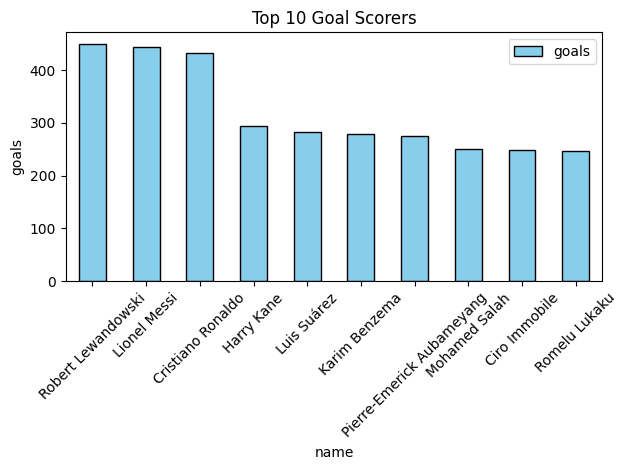

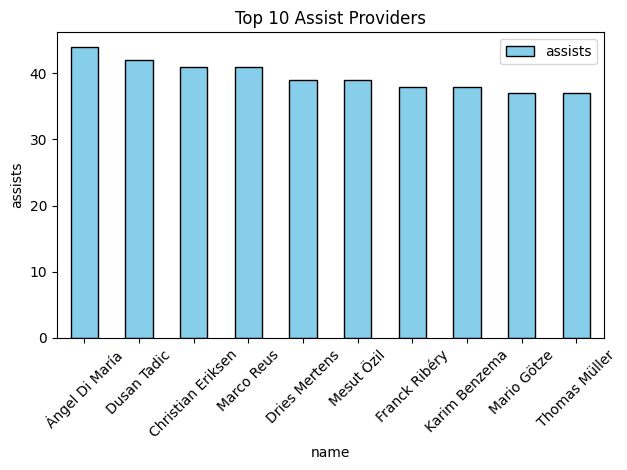

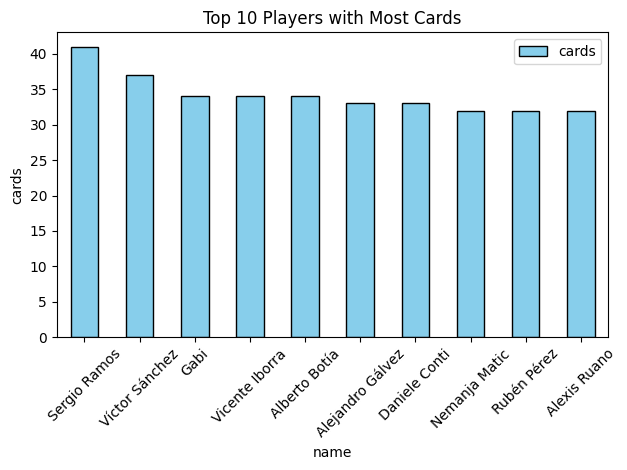

In [2]:
import matplotlib.pyplot as plt

# Function to plot the data
def plot_performance(data, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    data.plot(kind='bar', x=xlabel, y=ylabel, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Top Goal Scorers Plot
plot_performance(top_goal_scorers_with_names, 'Top 10 Goal Scorers', 'name', 'goals')

# Top Assist Providers Plot
plot_performance(top_assist_providers_with_names, 'Top 10 Assist Providers', 'name', 'assists')

# Players with Most Cards Plot
plot_performance(players_most_cards_with_names, 'Top 10 Players with Most Cards', 'name', 'cards')

plt.show()

In [3]:
import pandas as pd

# Load the datasets with the new naming convention
game_events_df = pd.read_csv('/kaggle/input/player-scores/game_events.csv')
players_df = pd.read_csv('/kaggle/input/player-scores/players.csv')

# Filtering the data for goals and assists
goals_data = game_events_df[game_events_df['type'] == 'Goals']
assists_data = game_events_df.dropna(subset=['player_assist_id'])

# Convert player_assist_id to int for proper merging
assists_data['player_assist_id'] = assists_data['player_assist_id'].astype('Int64')

# Merge the goals and assists data with players data to get player names
merged_goals = pd.merge(goals_data, players_df[['player_id', 'name']], left_on='player_id', right_on='player_id', how='left')
merged_assists = pd.merge(assists_data, players_df[['player_id', 'name']], left_on='player_assist_id', right_on='player_id', how='left')

# Aggregating goal counts and assist counts for players
goal_counts = merged_goals['name'].value_counts().head(10)
assist_counts = merged_assists['name'].value_counts().head(10)

# Function to extract goal types from descriptions
def extract_goal_type(description):
    description = description.lower()
    if 'header' in description:
        return 'Header'
    elif 'left-footed' in description:
        return 'Left-footed'
    elif 'right-footed' in description:
        return 'Right-footed'
    else:
        return 'Other'

# Applying the function to extract goal types
merged_goals['goal_type'] = merged_goals['description'].apply(extract_goal_type)

# Aggregating goal types for top scorers
top_scorers = set(goal_counts.index.tolist())
top_scorer_goal_types = merged_goals[merged_goals['name'].isin(top_scorers)].groupby('name')['goal_type'].value_counts()

# Displaying the results
print("\nGoal Types for Top Scorers:\n", top_scorer_goal_types)


/tmp/ipykernel_47/2308657751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assists_data['player_assist_id'] = assists_data['player_assist_id'].astype('Int64')



Goal Types for Top Scorers:
 name                       goal_type   
Ciro Immobile              Right-footed    112
                           Other            77
                           Left-footed      34
                           Header           26
Cristiano Ronaldo          Right-footed    153
                           Other           131
                           Header           80
                           Left-footed      69
Harry Kane                 Right-footed    124
                           Other            64
                           Header           59
                           Left-footed      47
Karim Benzema              Right-footed    144
                           Header           50
                           Other            47
                           Left-footed      38
Lionel Messi               Left-footed     269
                           Other           110
                           Right-footed     49
                           Header    

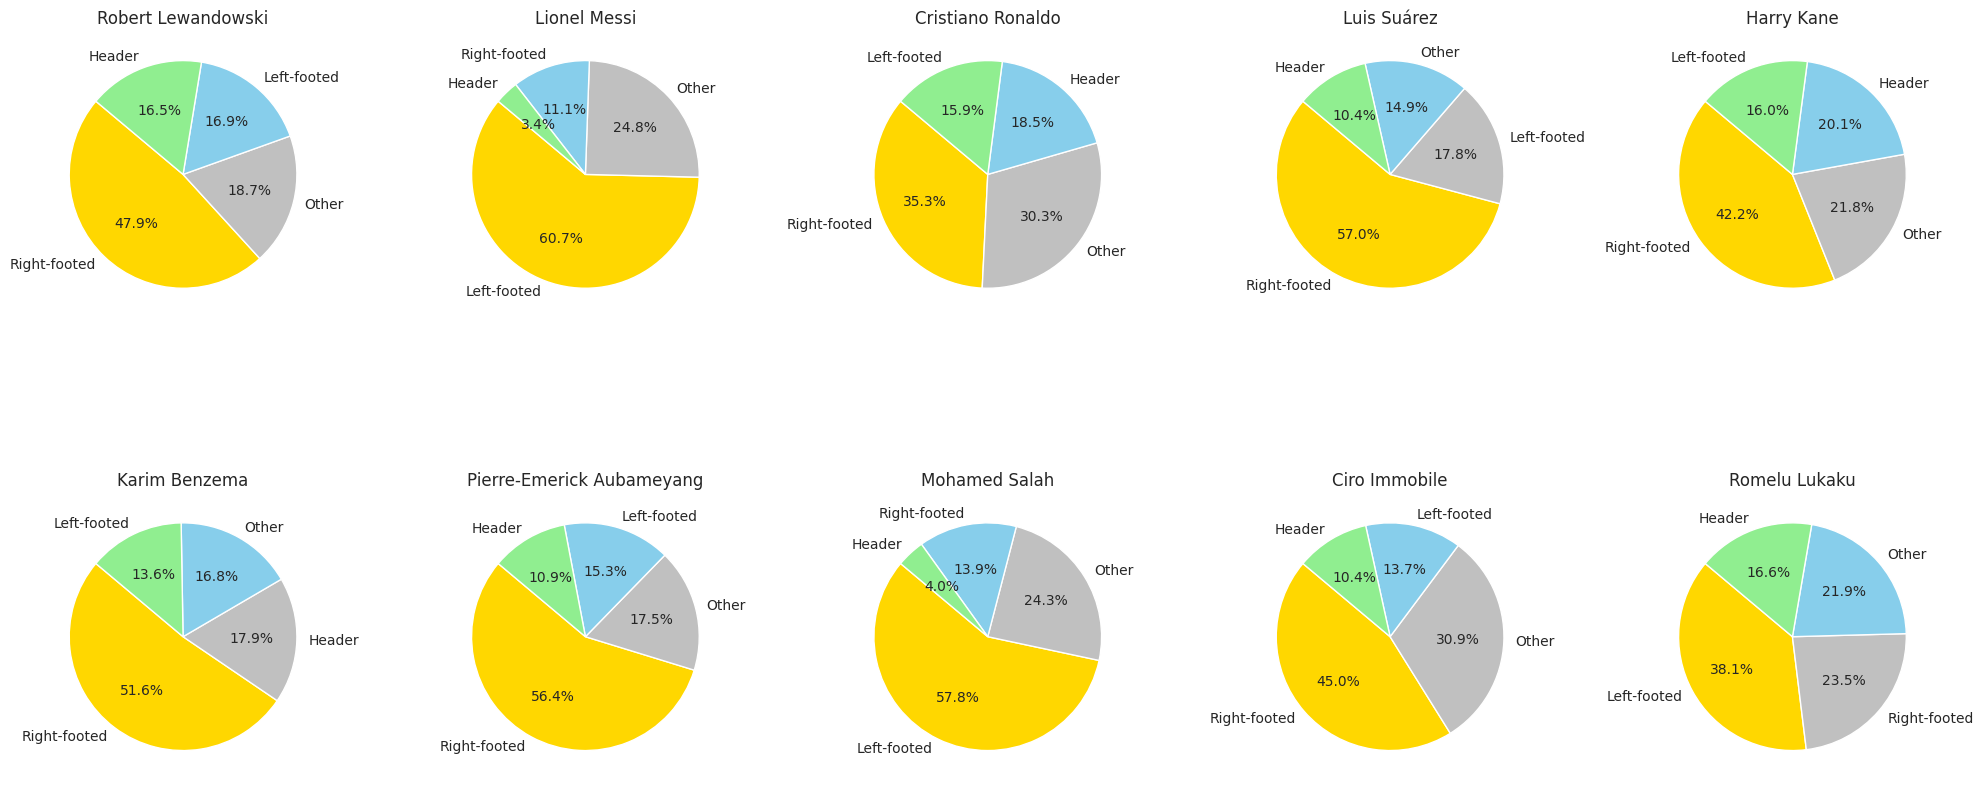

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating pie charts for the types of goals for each of the top 10 scorers

# Filtering top scorers data for pie chart visualization
top_scorers = goal_counts.index.tolist()
top_scorers_data = merged_goals[merged_goals['name'].isin(top_scorers)]

# Setting up the figure for multiple pie charts
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Generating pie charts for each top scorer
for i, scorer in enumerate(top_scorers):
    scorer_data = top_scorers_data[top_scorers_data['name'] == scorer]['goal_type'].value_counts()
    axes[i].pie(scorer_data, labels=scorer_data.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'silver', 'skyblue', 'lightgreen'])
    axes[i].set_title(scorer)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()